In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

In [23]:
# Paths to Dataset
dataset_path = 'holybasil\Holy_Basil'

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\dhyan\AppData\Local\Temp\ipykernel_20604\1997229433.py:2: SyntaxWarning: invalid escape sequence '\H'
  dataset_path = 'holybasil\Holy_Basil'


In [24]:
# Load Dataset
batch_size = 32
img_size = (224, 224)

train_ds = image_dataset_from_directory(
    dataset_path,
    labels='inferred',
    label_mode='binary',  # Healthy or Diseased
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 6000 files belonging to 2 classes.


In [25]:
# Preprocessing
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Splitting Dataset
val_size = int(0.2 * len(train_ds))
val_ds = train_ds.take(val_size)
train_ds = train_ds.skip(val_size)


In [26]:
# Model Building
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\dhyan\anaconda\envs\solar_segmentation\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:

# Custom Callback for Visual Logs
class TrainingVisualizer(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}/{epochs} - Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}, Val Loss: {logs['val_loss']:.4f}, Val Accuracy: {logs['val_accuracy']:.4f}")

# Training
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[TrainingVisualizer()])


Epoch 1/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.8634 - loss: 0.4041Epoch 1/20 - Loss: 0.1335, Accuracy: 0.9522, Val Loss: 0.0001, Val Accuracy: 1.0000
151/151 ━━━━━━━━━━━━━━━━━━━━ 52s 332ms/step - accuracy: 0.8640 - loss: 0.4023 - val_accuracy: 1.0000 - val_loss: 6.6600e-05
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 1.0000 - loss: 2.1290e-04Epoch 2/20 - Loss: 0.0001, Accuracy: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000
151/151 ━━━━━━━━━━━━━━━━━━━━ 51s 334ms/step - accuracy: 1.0000 - loss: 2.1239e-04 - val_accuracy: 1.0000 - val_loss: 1.9832e-06
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 1.0000 - loss: 1.4746e-05Epoch 3/20 - Loss: 0.0000, Accuracy: 1.0000, Val Loss: 0.0000, Val Accuracy: 1.0000
151/151 ━━━━━━━━━━━━━━━━━━━━ 84s 555ms/step - accuracy: 1.0000 - loss: 1.4731e-05 - val_accuracy: 1.0000 - val_loss: 5.9810e-07
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 1.0000 - loss: 2.7658e-05Epoch 4/

In [28]:
# Save Model
model.save('holy_basil_classifier.h5')

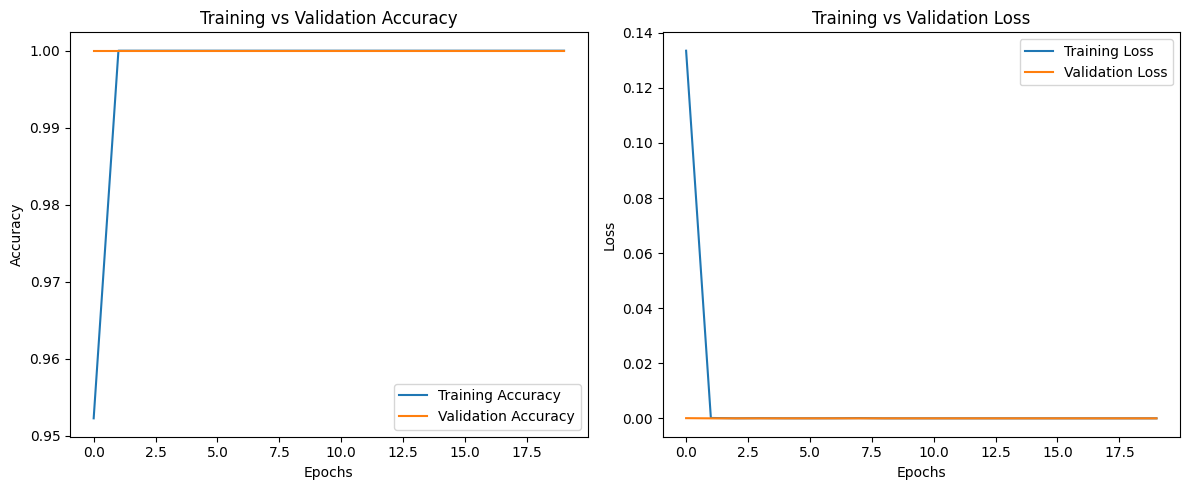

In [ ]:
# Plotting Training Results
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.tight_layout()
    plt.show()

plot_training_history(history)


In [33]:
# Test on a Single Image with Visualization
def classify_image(img_path):
    model = load_model('holy_basil_classifier.h5')
    img = keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = 'Healthy' if prediction[0][0] > 0.5 else 'Diseased'
    confidence = 100 * abs(0.5 - prediction[0][0]) * 2

    # Display the image with the prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


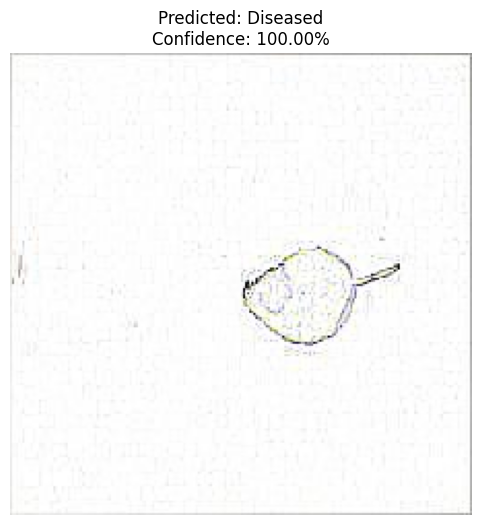

In [36]:
# Example
classify_image('copy_27_6_transformed_8_copy_0.jpg')